<a href="https://colab.research.google.com/github/Fakahmad/Machine_Learning/blob/main/Traffic_accidents_severity_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic accidents severity classification**

Description:
This dataset is collected by Addis Ababa traffic police departments for a
master's research project. The dataset has been prepared from manual records of
road traffic accidents of the year 2017-20. It has 32 features and 12316 instances
of the accident.

Objective is to use this data and then train machine learning mdoels so that classifications can be made about severity of all accidents. Also identify the major factors contributing to these accidents so that preventive steps can be taken.

Problem Statement:
The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features. F1-score will be used as metric for evaluation.

Install and import libraries for EDA, visualization, feature engineering, preparation, training, tuning, explainable AI

In [ ]:
# Visualizing and analysis of dataset using dabl library
!pip install dabl

In [ ]:
#to use explainable AI
!pip install shap

In [ ]:
# SMOTE (Synthetic Minority Over-sampling Technique)
!pip install imbalanced-learn

In [ ]:
# To visually convey comparison and anaylis of the models
!pip install evidently

In [4]:
# Import libraries for EDA and other tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import dabl
import evidently
pd.pandas.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Explainable AI
import shap

In [5]:
# to do model comparison and determine how and why a model is performing
# better than the others
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [6]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Set the path to the dataset on Google Drive
file_path = '/content/drive/Othercomputers/My Laptop/Google Drive/Datasets/traffic_accidents_severity/RTA Dataset.csv'

In [8]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

In [9]:
# showing a random sample of 5 rows to ensure dataset is uploaded correctly
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2768,14:48:00,Wednesday,18-30,Male,High school,Employee,Above 10yr,Lorry (41?100Q),Owner,NaN,NaN,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Going straight,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
11774,21:15:00,Thursday,18-30,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,NaN,No defect,Other,Undivided Two way,Tangent road with mountainous terrain and,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,NaN,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
8135,14:00:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,NaN,Owner,NaN,No defect,Office areas,One way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,1,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
11133,15:10:00,Friday,Over 51,Female,Junior high school,Employee,1-2yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,NaN,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,2,4,Going straight,Pedestrian,Male,18-30,3,Driver,Normal,Unknown or other,Changing lane to the left,Slight Injury
8878,16:15:00,Saturday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,NaN,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury


In [10]:
original_df = df.copy(deep=True) # storing in a variable for any further use later on

In [11]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 12316 Columns: 32


**EDA**

In [12]:
# Display information about columns and dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment  

In [13]:
# Statistical summary of numerical and then all columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [14]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12316.000000,12316.000000,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,NaN,NaN,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,NaN,NaN,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,NaN,NaN,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 2
Discrete feature Count 2
Continuous feature Count 0
Categorical feature Count 30


In [16]:
# Observations:There are columns with null values. We will determine later how big
# is the problem and how to handle it
# Except for 2 columns and target variable, rest are all categorical variables
# most accidents involve 2 vehicles
# average number of casualities (injured or died) is around 1.5

In [18]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [19]:
# some categoris have many values, we will handle these if considered a problem
# and effecting model training and the result
# Time will be converted into hours, so will be taken care of

In [20]:
# Find the total number of missing values and missing value percentage in each column
missing_values = df.isnull().sum()
total_values = df.shape[0]  # Total number of rows in the DataFrame

missing_percentage = (missing_values / total_values) * 100

# Combine the results into a DataFrame for better readability
missing_info = pd.DataFrame({
    'Total Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the missing information
print(missing_info)


                             Total Missing Values  Missing Percentage
Time                                            0            0.000000
Day_of_week                                     0            0.000000
Age_band_of_driver                              0            0.000000
Sex_of_driver                                   0            0.000000
Educational_level                             741            6.016564
Vehicle_driver_relation                       579            4.701202
Driving_experience                            829            6.731082
Type_of_vehicle                               950            7.713543
Owner_of_vehicle                              482            3.913608
Service_year_of_vehicle                      3928           31.893472
Defect_of_vehicle                            4427           35.945112
Area_accident_occured                         239            1.940565
Lanes_or_Medians                              385            3.126015
Road_allignment     

In [21]:
# The percentage of missing values is not high enough to drop them
# at this stage. Decision will be taken later on how to handle them

In [22]:
# Since the dataset contains many columns and rows with value 'na'
# therefore below code will find their number and percentage as well
na_count_per_column = df.isin(['na']).sum()

# Calculate percentage of 'na' values in each column
na_percentage_per_column = (na_count_per_column / len(df)) * 100

# Display the results
na_summary = pd.DataFrame({
    'Na Count': na_count_per_column,
    'Na Percentage': na_percentage_per_column
})

print(na_summary)

                             Na Count  Na Percentage
Time                                0       0.000000
Day_of_week                         0       0.000000
Age_band_of_driver                  0       0.000000
Sex_of_driver                       0       0.000000
Educational_level                   0       0.000000
Vehicle_driver_relation             0       0.000000
Driving_experience                  0       0.000000
Type_of_vehicle                     0       0.000000
Owner_of_vehicle                    0       0.000000
Service_year_of_vehicle             0       0.000000
Defect_of_vehicle                   0       0.000000
Area_accident_occured               0       0.000000
Lanes_or_Medians                    0       0.000000
Road_allignment                     0       0.000000
Types_of_Junction                   0       0.000000
Road_surface_type                   0       0.000000
Road_surface_conditions             0       0.000000
Light_conditions                    0       0.

In [23]:
# These are 4 associated columns with 'na' values. There appears to be a
# business reason for this. Does not seem to be a problem at this stage

In [24]:
# Count rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Display the number of rows with missing values
print("Number of rows with missing values:", len(rows_with_missing))


Number of rows with missing values: 9427


In [25]:
# percentage of rows with more than 50% missing values
threshold = 0.5  # Set the threshold for missing values

# Calculate the percentage of missing values in each row
missing_percentage = df.isnull().mean(axis=1)

# Filter rows with more than 50% missing values
rows_with_missing_values = df[missing_percentage > threshold]

# Display the resulting DataFrame
print(rows_with_missing_values)


Empty DataFrame
Columns: [Time, Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation, Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions, Weather_conditions, Type_of_collision, Number_of_vehicles_involved, Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty, Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality, Pedestrian_movement, Cause_of_accident, Accident_severity]
Index: []


In [26]:
# Count of total duplicate rows
total_duplicates = df.duplicated().sum()
print("\nTotal Count of Duplicate Rows in the Dataset:", total_duplicates)


Total Count of Duplicate Rows in the Dataset: 0


In [ ]:
# no rows with more than 50% missing values.
# no duplicate rows also
# will not drop any rows based on above analysis

#Data Visualization

In [23]:
# since the target variable is multiclass, therefore we will analyse
# and display this variable first

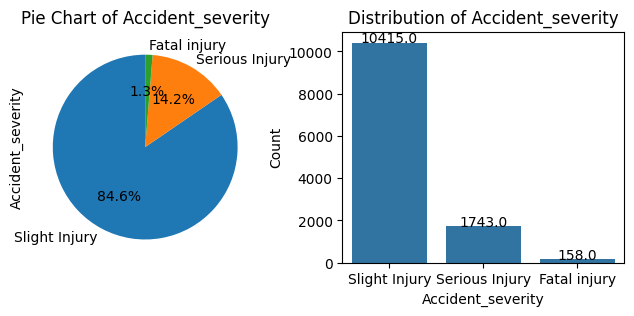

In [27]:
target_variable = 'Accident_severity'

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Pie chart for the target variable
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title(f'Pie Chart of {target_variable}')

# Bar graph with count labels on top of each bar
sns.countplot(data=df, x=target_variable, ax=axes[1])
axes[1].set_title(f'Distribution of {target_variable}')
axes[1].set_xlabel(target_variable)
axes[1].set_ylabel('Count')

# Display the count labels on top of each bar in the bar graph
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].text(patch.get_x() + patch.get_width() / 2, height + 0.3, f'{height}', ha='center')

# Display the plots
plt.show()


In [ ]:
# target variable is highly imbalanced, so we will employ some technique
# later on to balance it before training our models

In [28]:
# before further analysis, we will convery time into hour of day
# and use this as a proper categorical variable
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time'] = df['Time'].dt.hour

In [29]:
df_hour = df.copy(deep=True)

In [ ]:
# Next we create graphs of different categorical variables wrt target variable

Number of Categorical Variables: 29


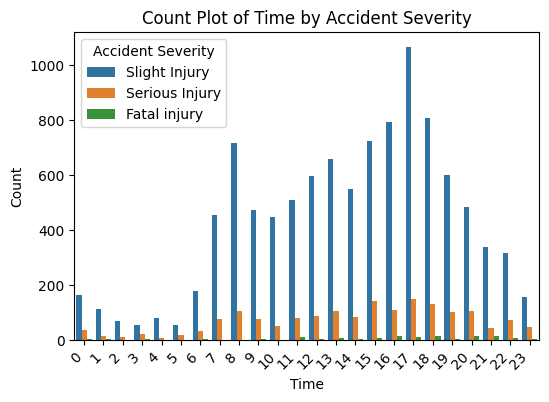

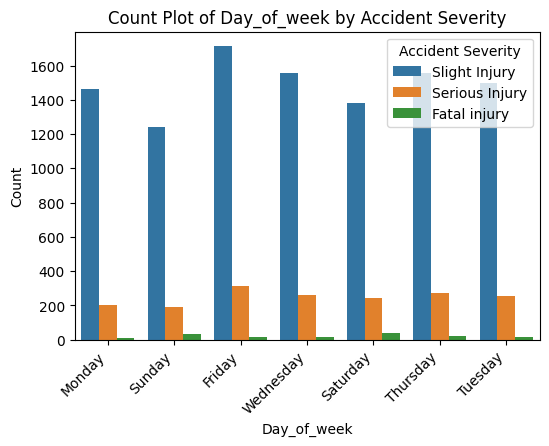

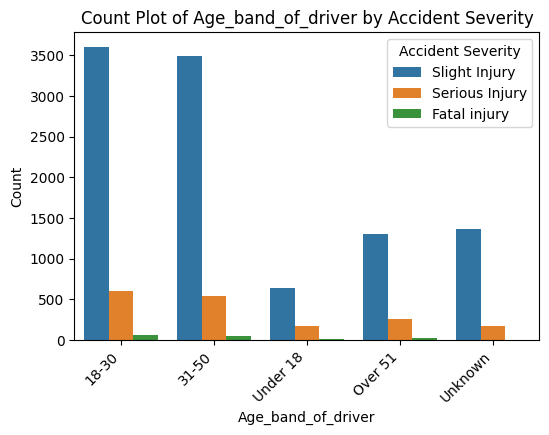

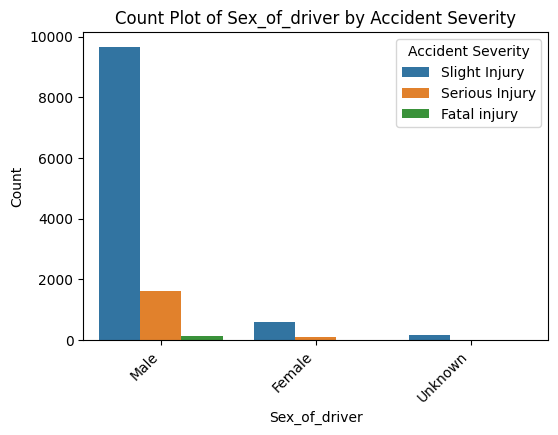

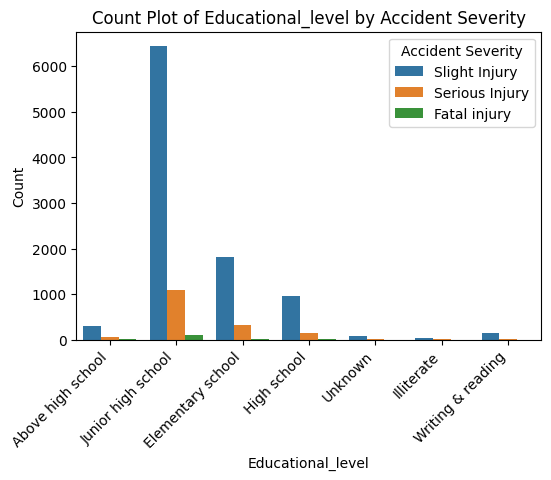

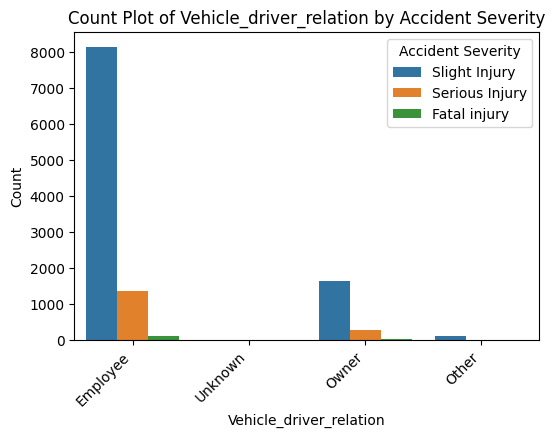

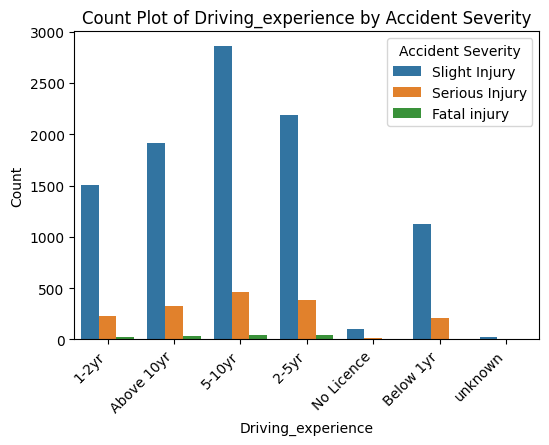

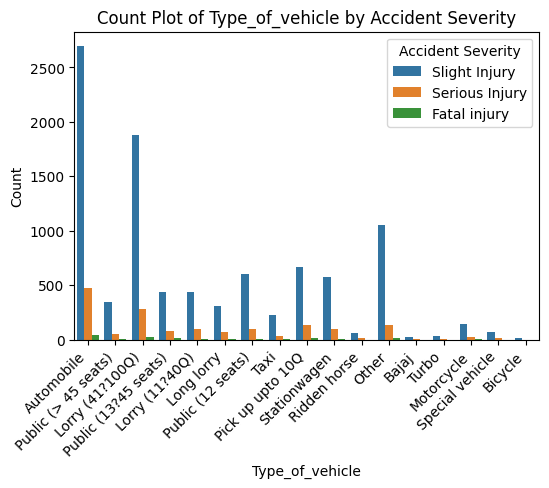

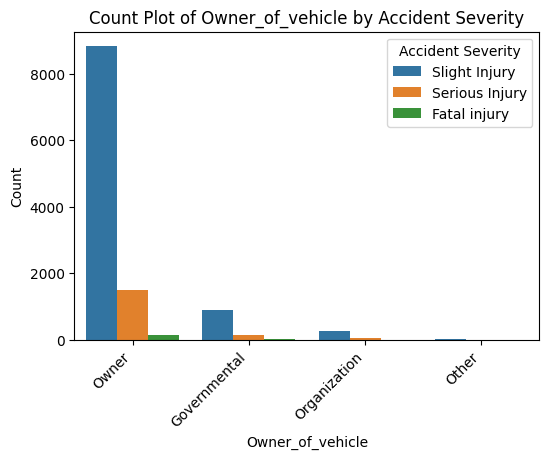

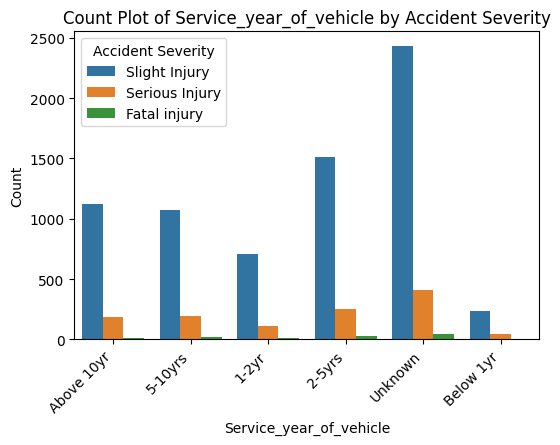

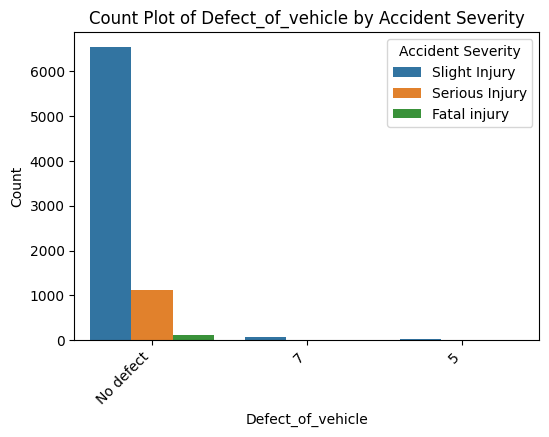

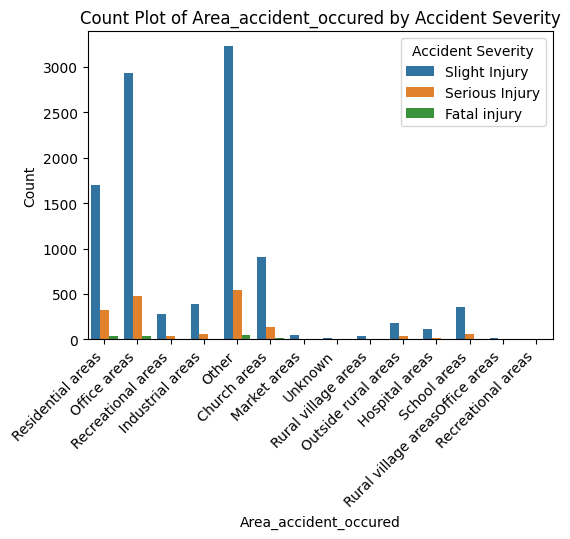

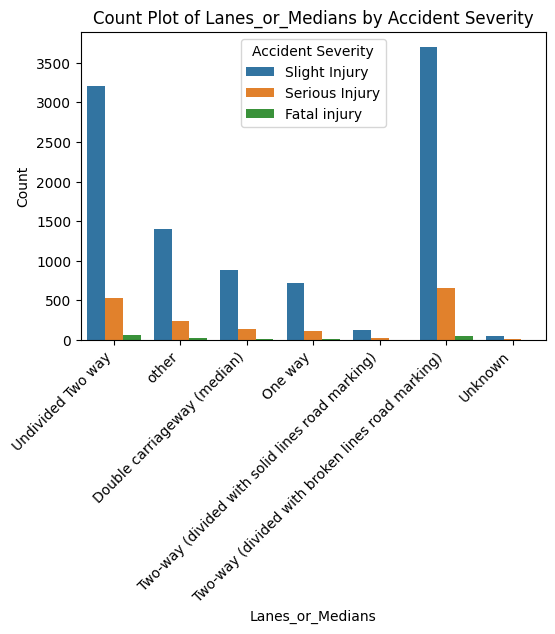

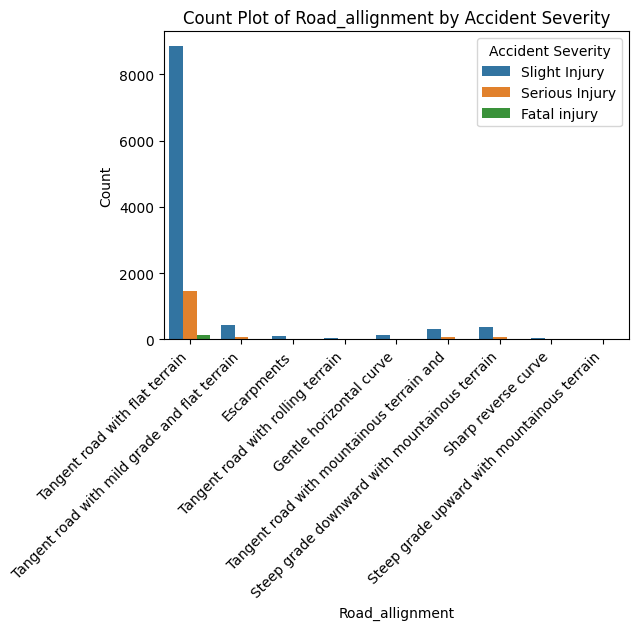

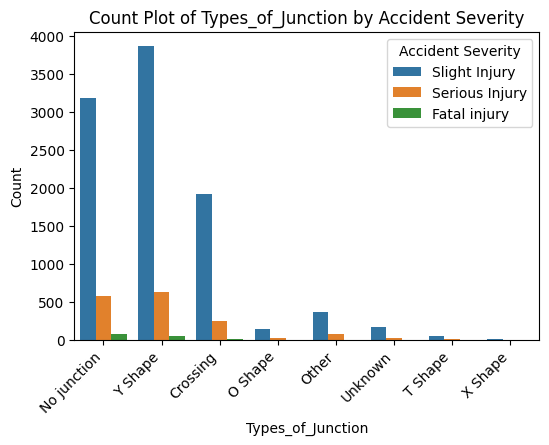

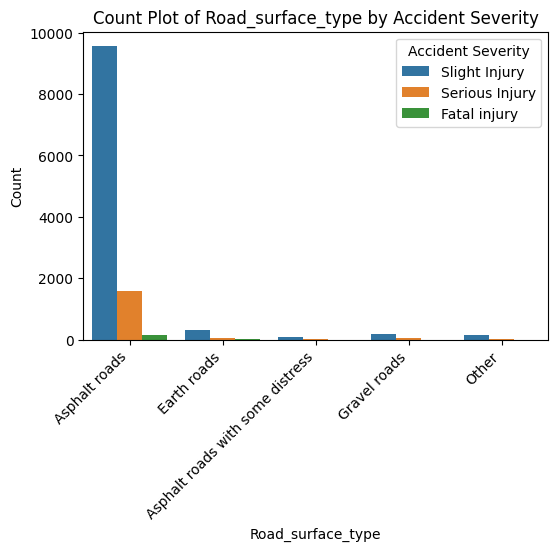

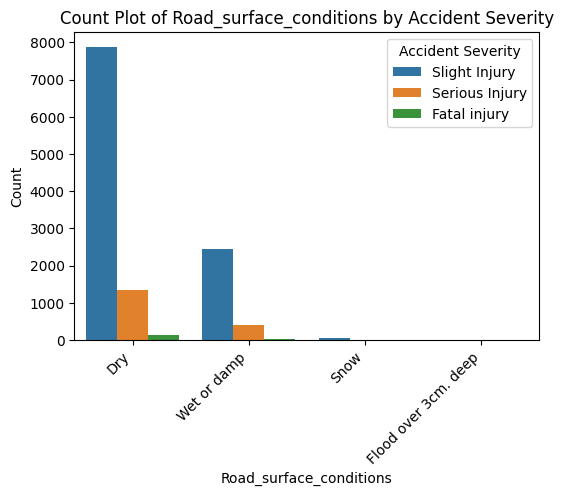

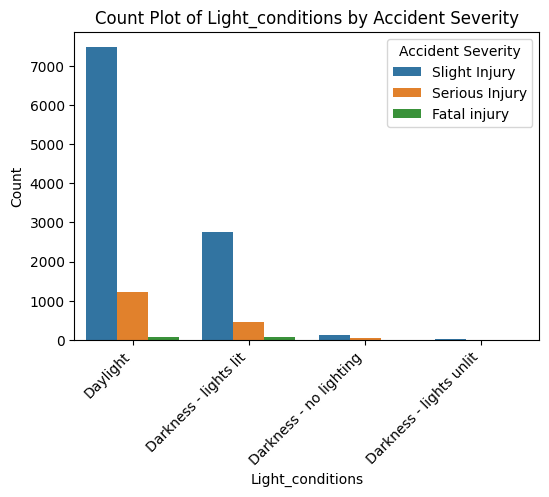

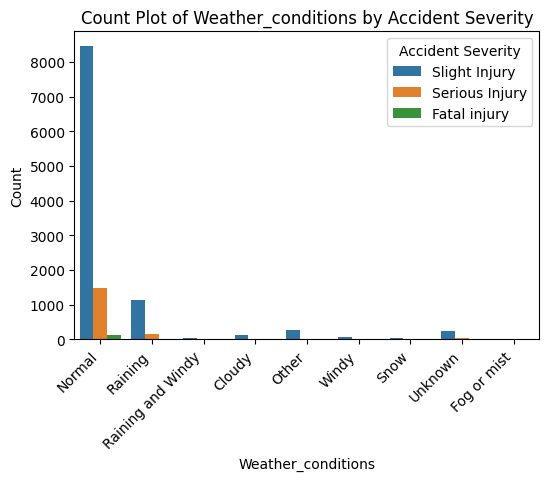

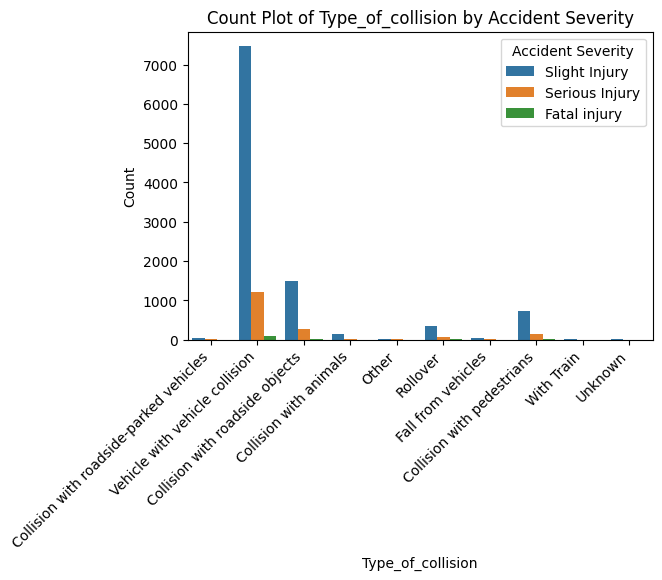

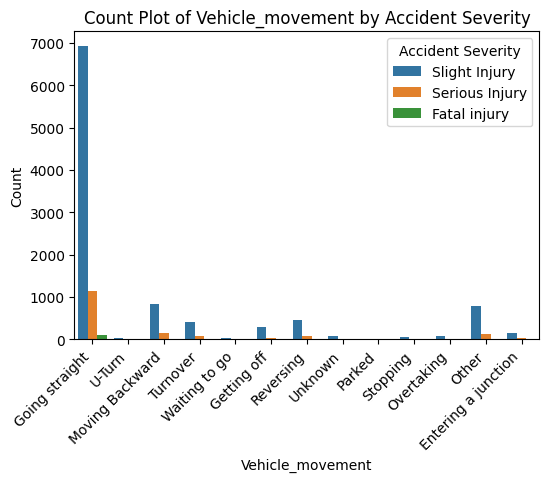

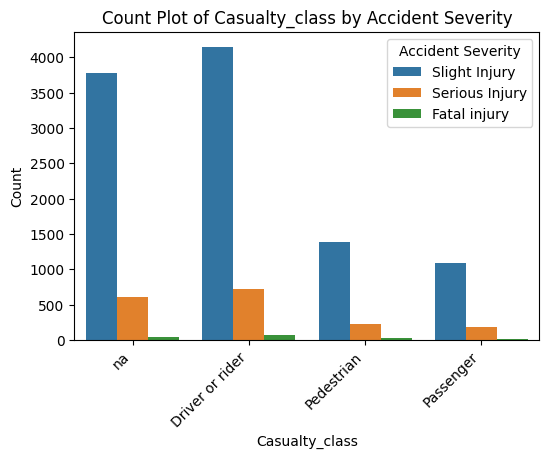

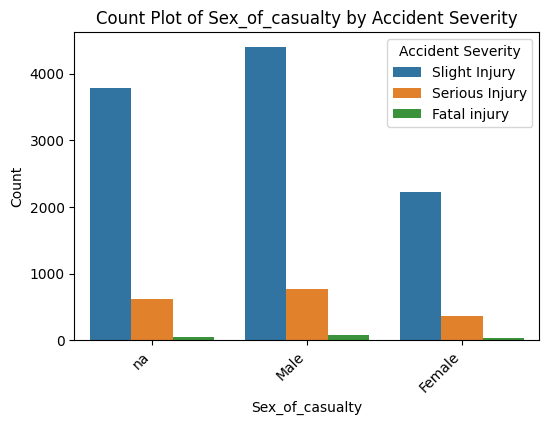

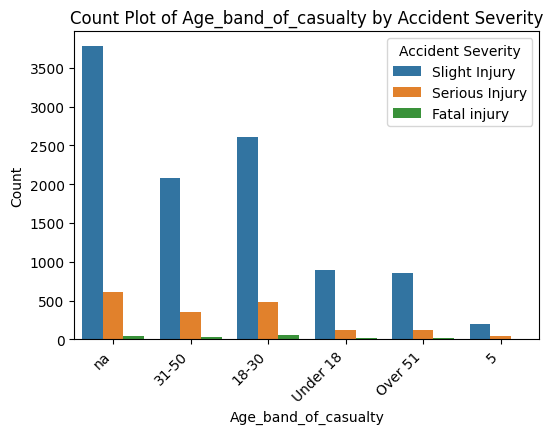

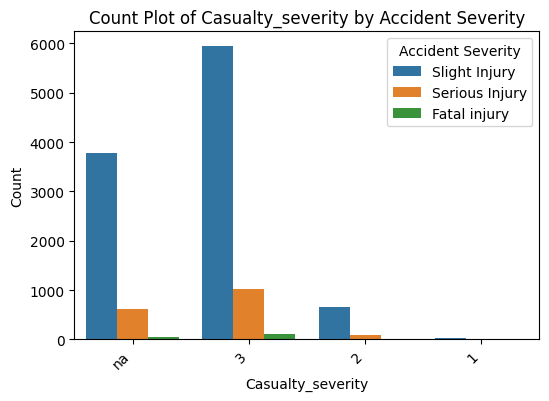

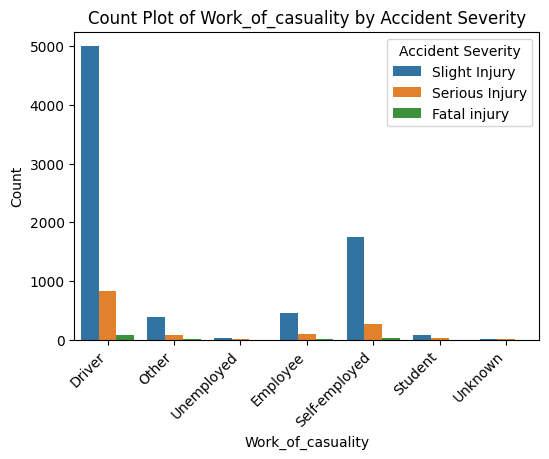

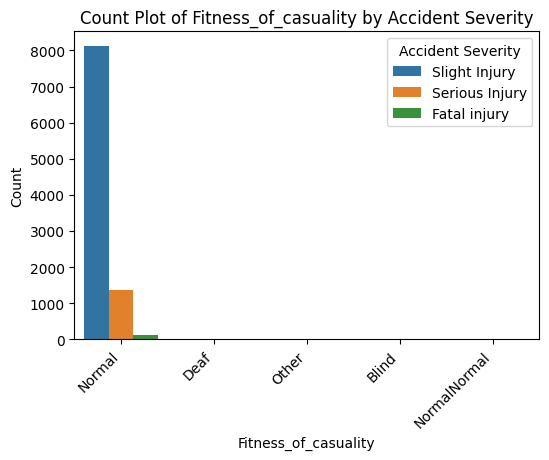

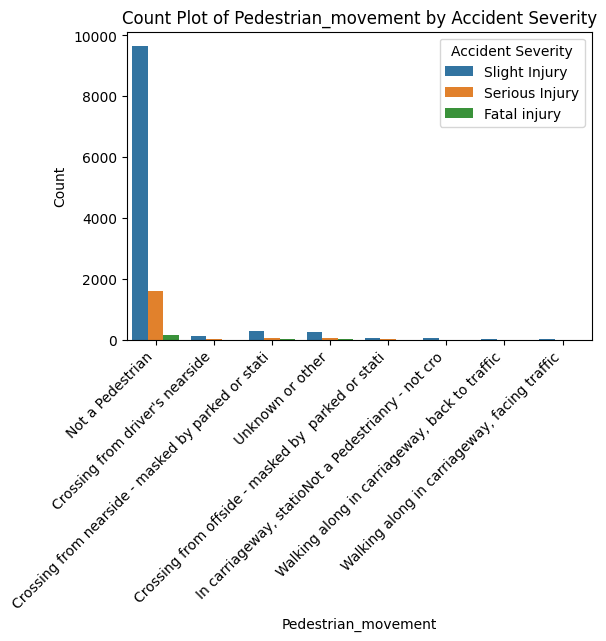

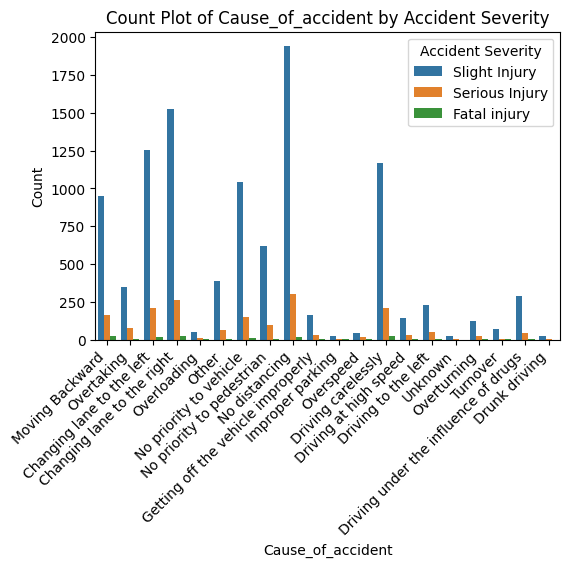

In [30]:
# Extracting categorical columns from the dataset, apart from 2 columns, rest
# all 29 are categorical variables
categorical_cols = [
    'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
    'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
    'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident'
]

# Print the number of categorical variables
num_categorical_vars = len(categorical_cols)
print(f"Number of Categorical Variables: {num_categorical_vars}")

# Plotting count plot for target variable against each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))

    # Limit the displayed categorical values to the first 50 characters
    df[col] = df[col].apply(lambda x: x[:50] if isinstance(x, str) and len(x) > 50 else x)

    sns.countplot(x=col, hue='Accident_severity', data=df)
    plt.title(f'Count Plot of {col} by Accident Severity')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Accident Severity')
    plt.show()


In [31]:
# There are number of observation and conclusions drawn from above graphs
# Most accidents and fatalities happen during afternoon and evening rush hour
# Friday and weekdays have more accidents, however fatalities happen more over
# the weekend
# Most accidents caused by drivers in the age 18-30, means driving experience matters
# a lot in this city
# Large majority of drivers are male and hence they also cause the most accidents
# Majority of accidents are caused by the employees and not by owner of vehicles
# majority of accidents are on normal, paved asphalt roads, which is the case in Addis Ababa
# Chance of serious accident during darkness is higher
# most collisions are between 2 or more vehicles and then with roadside objects
# In majority of cases, drivers themself are the victim of accident
# In many cases, age of victim could not be determined, maybe the person fled the scene
# or refused to give information
# The highest cause of accident is not keeping safe distance from the vehicle in front, which
# is in line with data from other big cities as well
# A review and analysis of above graphs does not give a strong enough reason to drop
# any of the columns at this moment.

In [32]:
# Now dabl library will be used to get further insights about columns

Target looks like classification
Linear Discriminant Analysis training set score: 0.333
Showing only top 10 of 31 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: ylabel='Time'>, <Axes: >],
         [<Axes: xlabel='Time', ylabel='Number_of_casualties'>,
          <Axes: xlabel='Number_of_casualties'>]], dtype=object),
  <Figure size 800x400 with 2 Axes>,
  <Figure size 400x400 with 1 Axes>],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>],
        [<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Type_of_collision'}>]], dtype=object)]

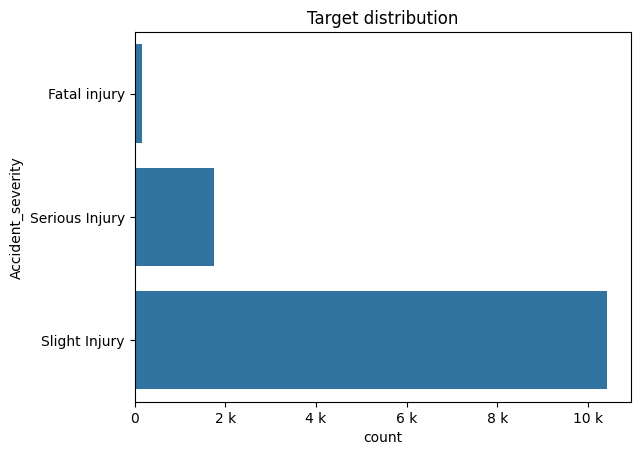

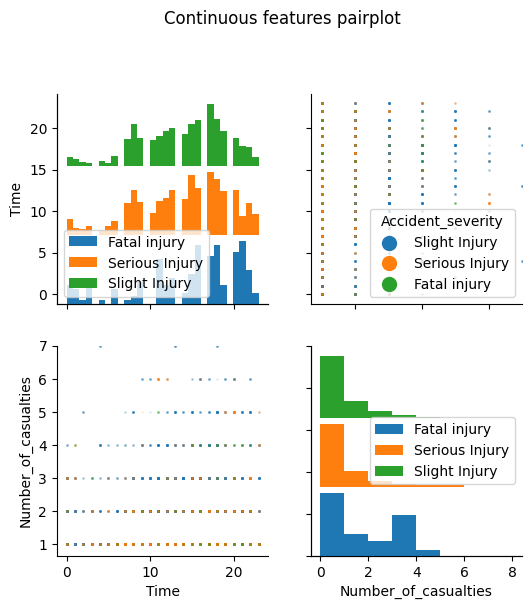

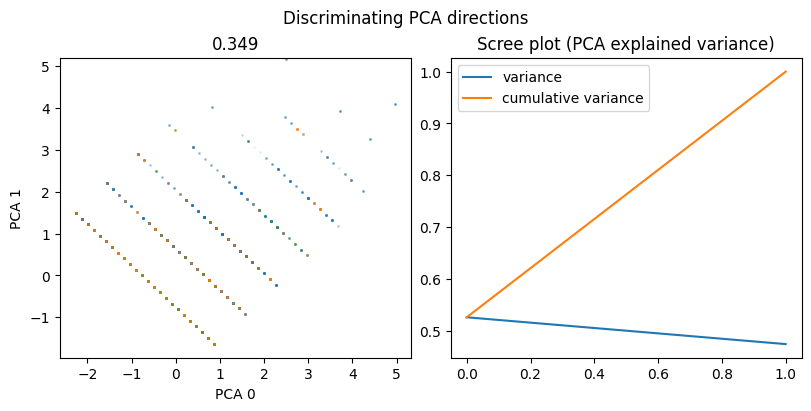

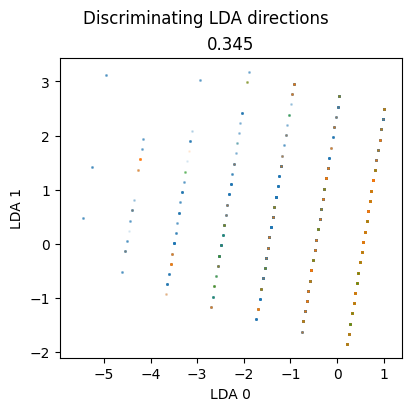

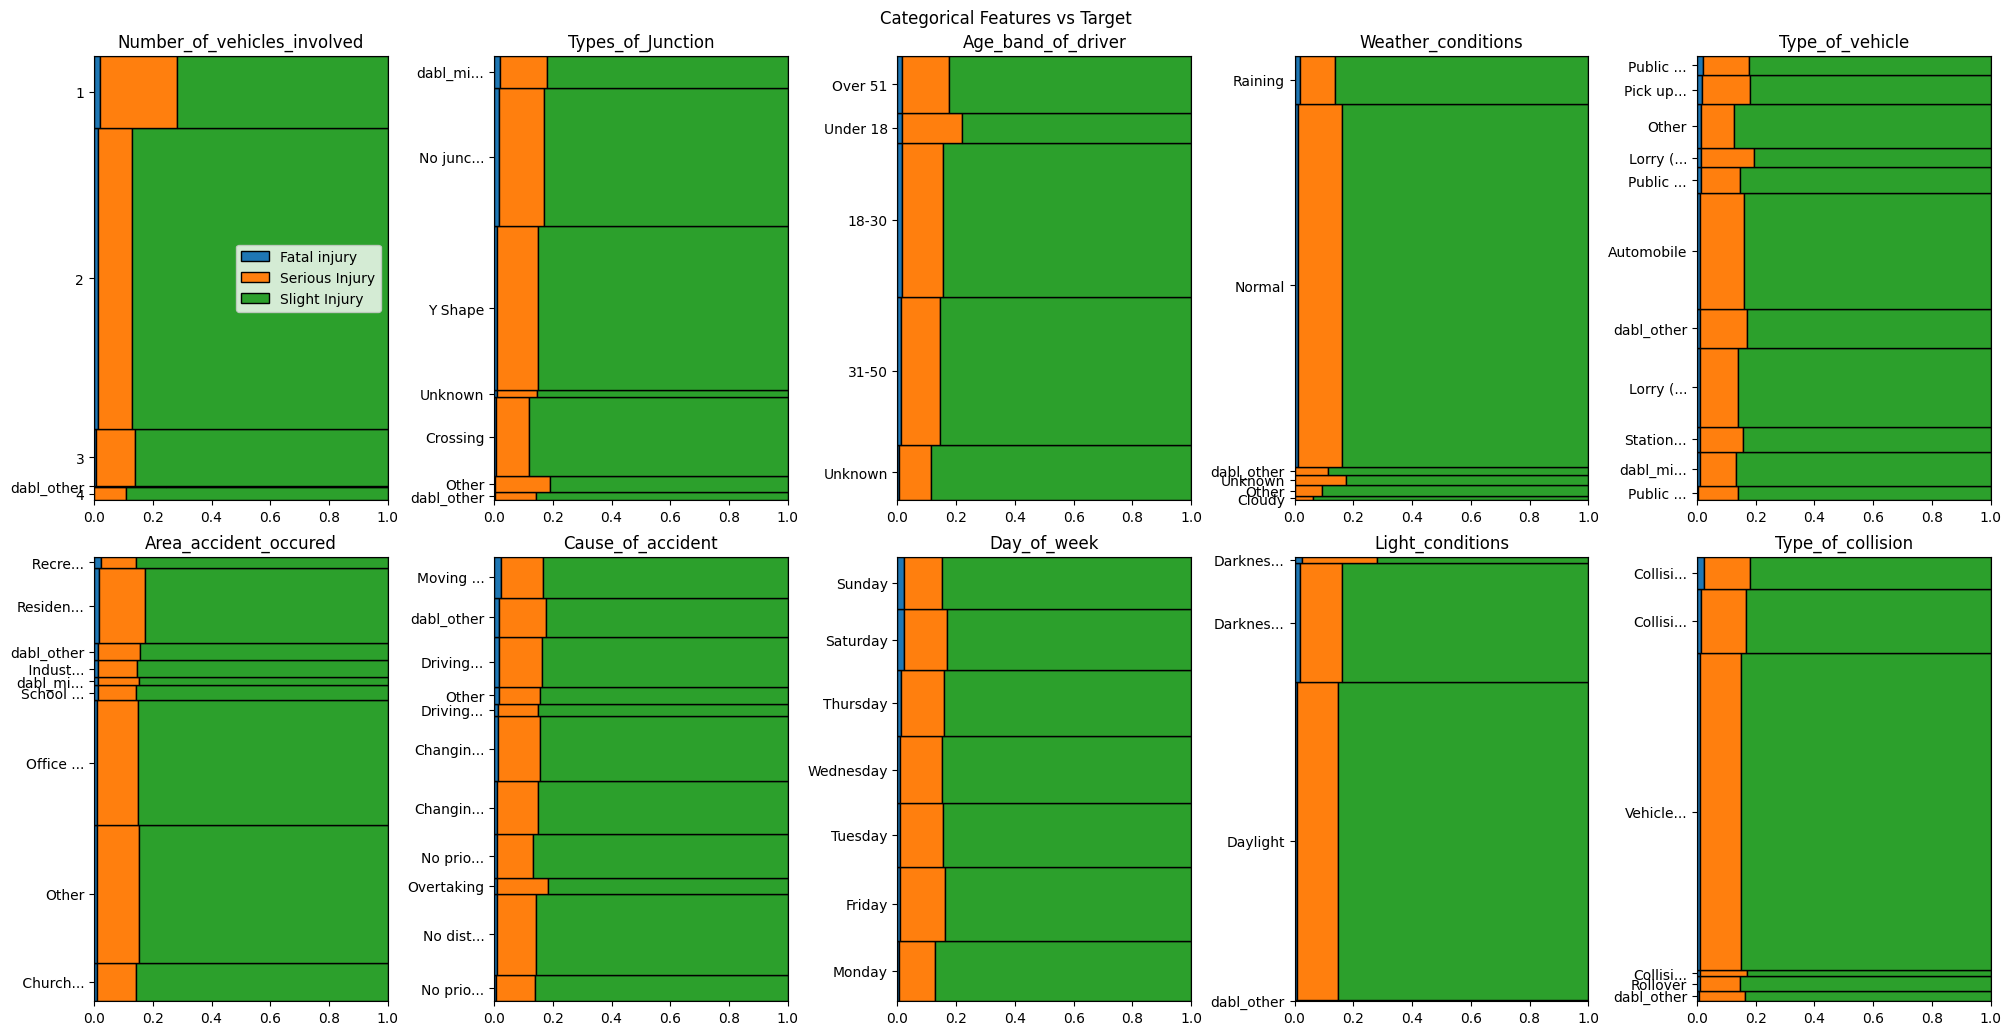

In [28]:
dabl.plot(df, target_col='Accident_severity')

In [33]:
# dabl analysis has identified top 10 features.
# we can see that if more number of vehicles are involved and more casualities involved
# in an accident, then the chances of fatal injury are more.
# similarly, higher accidents on weekends and also in darkness.
# In other features also we can see some corelation, even though visually not very clear.
# So at this point, we can say that all of the above 10 features should be used in our
# modeling. Same time we have done some other visualizations also and do have some domain
# knowledge as well, plus done some Excel based analysis of data as well.
# Based on all these factors, below 2 columns can be dropped, as they have very
# random values, the usage or meaning of the values is also not clear

In [34]:
# Dropping 2 columns, as atated above
df.drop(['Defect_of_vehicle', 'Fitness_of_casuality'], axis=1, inplace=True)

In [35]:
# Remove specified values from list of categorical_cols
values_to_remove = ['Defect_of_vehicle', 'Fitness_of_casuality']
categorical_cols = [col for col in categorical_cols if col not in values_to_remove]

In [36]:
df_30 = df.copy(deep=True)

In [37]:
df.shape

(12316, 30)

In [38]:
# We will try using SelectKbest technique next.
# But before that, we need to handle null values.
# This data appears to have been captured meticulosly. So wherever we
# have null values, we can assume that investigation did not reveal any data, so
# we will change those to 'unknown'.
# 'na' values will not be changed assuming they are actual values of dataset
# after doing the above, we will do one hot encoding and then use SelecKbest technique

In [39]:
df.replace('Unknown', 'unknown', inplace=True) #convert Unknown to lowercase

In [40]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(df[null_columns].isnull().sum())

Columns with null values:
Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
dtype: int64


In [41]:
# Replace null values with 'unknown'
df.fillna('unknown', inplace=True)

In [42]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(df[null_columns].isnull().sum())

Columns with null values:
Series([], dtype: float64)


In [43]:
df_30_no_nulls = df.copy(deep=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [ ]:
# no null values are left in dataset

In [45]:
# Perform one-hot encoding including the target variable
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [46]:
df_encoded_backup = df_encoded.copy(deep=True) # keeping backup in case required

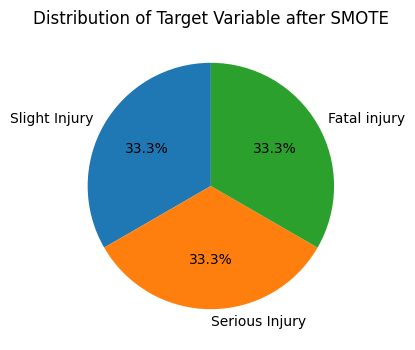

In [47]:
# Now df_encoded is one-hot encoded feature matrix, and 'Accident_severity' is the
# target variable. We will use SMOTE technique to balance the dataset
X = df_encoded.drop(columns=['Accident_severity'])
y = df_encoded['Accident_severity']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display a pie chart to show the balance after SMOTE
plt.figure(figsize=(4, 4))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable after SMOTE')
plt.show()


In [ ]:
# as we can see above, dataset has been balanced across all three classes

In [48]:
# Apply SelectKBest with K=50. Value 50 was arrived at after few iterations
# testing
X_temp = X_resampled
y_temp = y_resampled

k_best = SelectKBest(f_classif, k=50)
X_selected = k_best.fit_transform(X_temp, y_temp)

# Get the names of the selected columns
selected_columns = X_temp.columns[k_best.get_support(indices=True)]

# Display the selected column names
print("Selected Columns:", selected_columns)


Selected Columns: Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_7',
       'Time_8', 'Time_10', 'Time_12', 'Time_14', 'Time_17',
       'Day_of_week_Monday', 'Day_of_week_Sunday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Age_band_of_driver_31-50',
       'Age_band_of_driver_Over 51', 'Age_band_of_driver_unknown',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Vehicle_driver_relation_Owner', 'Driving_experience_5-10yr',
       'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr',
       'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Other',
       'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_unknown',
       'Service_year_of_vehicle_5-10yrs', 'Service_year_of_vehicle_Above 10yr',
       'Area_accident_occured_ Church areas',
       'Area_accident_occured_Office areas', 'Area_accident_occured_Other',
       'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
       'Lanes

In [49]:
# Above 50 most impactful columns with corresponding categorical
# values have been selected for modeling. It includes previously identified
# columns by DABL

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)


In [51]:
# Defining below the 5 models selected for training
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
}

In [52]:
# Initialize metrics dictionaries
train_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}
test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}

In [53]:
# Train and evaluate models
for name, model in models.items():
    if name == 'LogisticRegression':
        # Scale the data for Logistic Regression, it wasn't converging otherwise
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    # Training set metrics
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    train_f1 = f1_score(y_train, train_preds, average='weighted')

    # Testing set metrics
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')
    test_f1 = f1_score(y_test, test_preds, average='weighted')

    # Confusion matrices
    cm_train = confusion_matrix(y_train, train_preds)
    cm_test = confusion_matrix(y_test, test_preds)

    # Append metrics to dictionaries
    train_metrics['Model'].append(name)
    train_metrics['Accuracy'].append(train_accuracy)
    train_metrics['Precision'].append(train_precision)
    train_metrics['Recall'].append(train_recall)
    train_metrics['F1 Score'].append(train_f1)
    train_metrics['Confusion Matrix'].append(cm_train)

    test_metrics['Model'].append(name)
    test_metrics['Accuracy'].append(test_accuracy)
    test_metrics['Precision'].append(test_precision)
    test_metrics['Recall'].append(test_recall)
    test_metrics['F1 Score'].append(test_f1)
    test_metrics['Confusion Matrix'].append(cm_test)

In [54]:
# Display the training and testing metrics in tables
train_df = pd.DataFrame(train_metrics).set_index('Model')
test_df = pd.DataFrame(test_metrics).set_index('Model')

print("Training Set Metrics:")
print(train_df)

print("\nTesting Set Metrics:")
print(test_df)


Training Set Metrics:
                    Accuracy  Precision    Recall  F1 Score  \
Model                                                         
RandomForest        0.990238   0.990408  0.990238  0.990239   
GradientBoosting    0.790927   0.790343  0.790927  0.790530   
LogisticRegression  0.345455   0.467141  0.345455  0.191670   
SVM                 0.863058   0.862079  0.863058  0.860607   
DecisionTree        0.990238   0.990407  0.990238  0.990239   

                                                     Confusion Matrix  
Model                                                                  
RandomForest            [[8323, 7, 0], [205, 8109, 1], [4, 27, 8320]]  
GradientBoosting    [[7088, 1129, 113], [1227, 5830, 1258], [285, ...  
LogisticRegression    [[274, 132, 7924], [5, 13, 8297], [3, 0, 8348]]  
SVM                 [[8003, 249, 78], [973, 6151, 1191], [100, 832...  
DecisionTree            [[8323, 7, 0], [205, 8110, 0], [4, 28, 8319]]  

Testing Set Metrics:
          

In [55]:
# Display confusion matrix in a graph

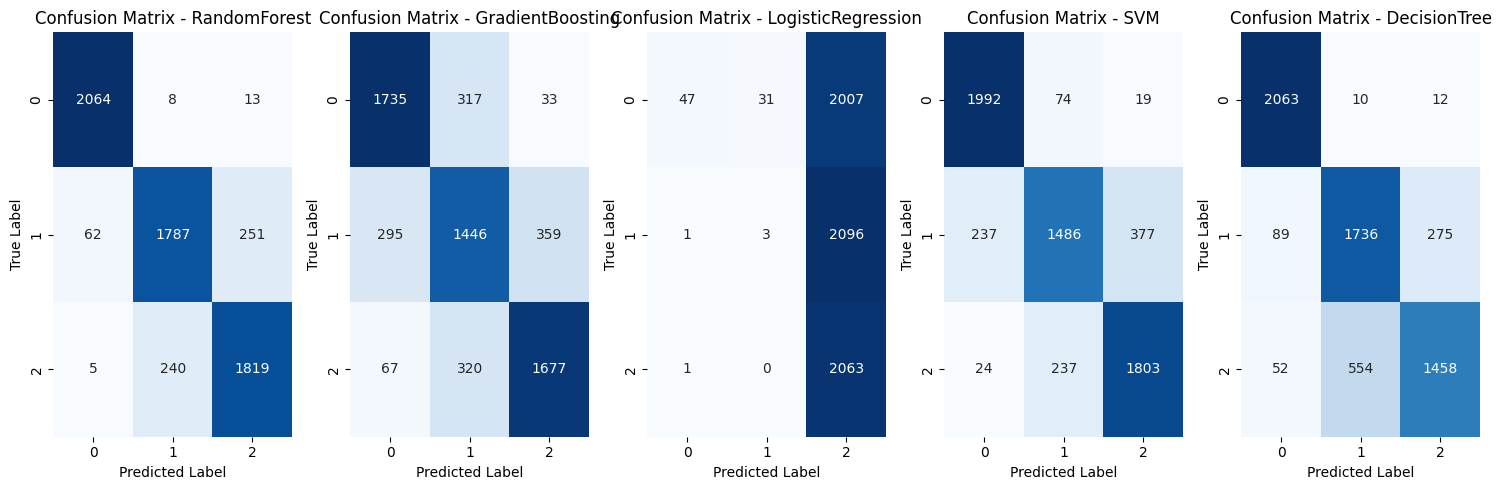

In [56]:
# Set up subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

# Evaluate models
for i, (name, model) in enumerate(models.items()):
    # Extract confusion matrix from the test metrics
    cm = test_metrics['Confusion Matrix'][test_metrics['Model'].index(name)]

    # Plot the confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

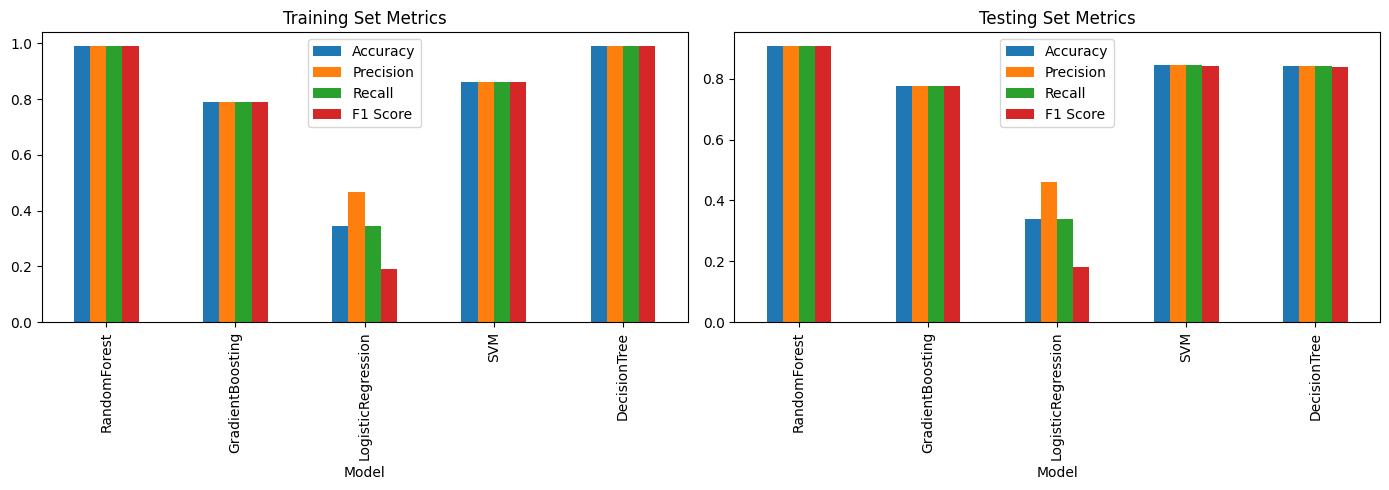

In [57]:
# Display metrics in a bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for training set metrics
train_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Set Metrics')

# Bar chart for testing set metrics
test_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Testing Set Metrics')

plt.tight_layout()
plt.show()


In [58]:
# RandomForest and DecionTree provide the best results, both on training and testing
# data sets. Logisticsregression has poorest results.
# Next we will use Hyper parameter tuning and then compare the rsults before and after

In [59]:
# Define the top 4 models for hyperparameter tuning and their parameters
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
}

# Define hyperparameters for tuning
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, 'balanced'],
    },
    'GradientBoosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    },
    'SVM': {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'class_weight': [None, 'balanced'],
    },
    'DecisionTree': {
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, 'balanced'],
    },
}

In [60]:
import time # want to display time as tuning taks a lot of time

In [61]:
# Hyperparameter tuning loop
# Create a dictionary to store tuned models
tuned_models = {}
for name, model in models.items():
    # Display the current time
    current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    print(f"Tuning {name} at {current_time}...")
    print(f"Tuning {name}...")
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid[name], scoring='f1_weighted', cv=3, n_jobs=-1)
    # Fit the model
    grid_search.fit(X_train, y_train)
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    # Store the tuned model in the dictionary
    tuned_models[name] = best_model

    # Display the best hyperparameters for each model
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")

Tuning RandomForest at 2024-03-10 17:25:34...
Tuning RandomForest...
Best hyperparameters for RandomForest: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tuning GradientBoosting at 2024-03-10 17:27:03...
Tuning GradientBoosting...
Best hyperparameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuning SVM at 2024-03-10 17:35:44...
Tuning SVM...
Best hyperparameters for SVM: {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Tuning DecisionTree at 2024-03-10 17:50:13...
Tuning DecisionTree...
Best hyperparameters for DecisionTree: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [62]:
# Evaluate models before and after tuning
tuned_train_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
tuned_test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Loop through tuned models
for name, model in tuned_models.items():
    # Training set metrics
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    train_f1 = f1_score(y_train, train_preds, average='weighted')

    # Testing set metrics
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')
    test_f1 = f1_score(y_test, test_preds, average='weighted')

    # Append metrics to dictionaries
    tuned_train_metrics['Model'].append(name)
    tuned_train_metrics['Accuracy'].append(train_accuracy)
    tuned_train_metrics['Precision'].append(train_precision)
    tuned_train_metrics['Recall'].append(train_recall)
    tuned_train_metrics['F1 Score'].append(train_f1)

    tuned_test_metrics['Model'].append(name)
    tuned_test_metrics['Accuracy'].append(test_accuracy)
    tuned_test_metrics['Precision'].append(test_precision)
    tuned_test_metrics['Recall'].append(test_recall)
    tuned_test_metrics['F1 Score'].append(test_f1)

# Display metrics in tables
tuned_train_df = pd.DataFrame(tuned_train_metrics).set_index('Model')
tuned_test_df = pd.DataFrame(tuned_test_metrics).set_index('Model')

print("\nTraining Set Metrics (After Tuning):")
print(tuned_train_df)

print("\nTesting Set Metrics (After Tuning):")
print(tuned_test_df)


Training Set Metrics (After Tuning):
                  Accuracy  Precision    Recall  F1 Score
Model                                                    
RandomForest      0.983117   0.983238  0.983117  0.983064
GradientBoosting  0.857737   0.856693  0.857737  0.856870
SVM               0.863058   0.862079  0.863058  0.860607
DecisionTree      0.990238   0.990407  0.990238  0.990239

Testing Set Metrics (After Tuning):
                  Accuracy  Precision    Recall  F1 Score
Model                                                    
RandomForest      0.907185   0.906995  0.907185  0.906592
GradientBoosting  0.841095   0.839577  0.841095  0.840032
SVM               0.845095   0.843708  0.845095  0.842102
DecisionTree      0.846535   0.846775  0.846535  0.844540


In [63]:

# Calculate percentage improvement in each metric
percentage_improvement_train = {}
percentage_improvement_test = {}

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    percentage_improvement_train[metric] = [
        ((after - before) / before) * 100
        for before, after in zip(train_metrics[metric], tuned_train_metrics[metric])
    ]
    percentage_improvement_test[metric] = [
        ((after - before) / before) * 100
        for before, after in zip(test_metrics[metric], tuned_test_metrics[metric])
    ]


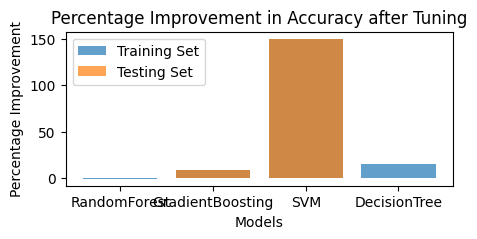

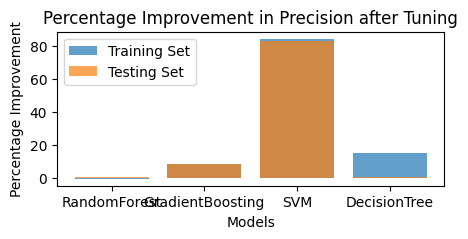

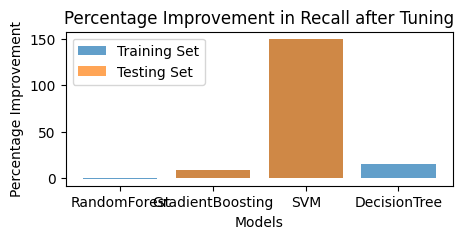

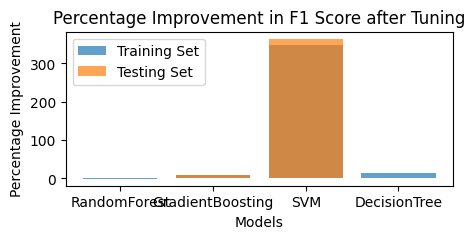

In [64]:
# Plot the improvement for each model
models_list = list(models.keys())

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.figure(figsize=(5, 2))

    plt.bar(models_list, percentage_improvement_train[metric], label='Training Set', alpha=0.7)
    plt.bar(models_list, percentage_improvement_test[metric], label='Testing Set', alpha=0.7)

    plt.xlabel('Models')
    plt.ylabel('Percentage Improvement')
    plt.title(f'Percentage Improvement in {metric} after Tuning')
    plt.legend()
    plt.show()

In [65]:
# Find and display information about the best model based on F1 Score after tuning
best_model_name = tuned_test_df['F1 Score'].idxmax()
best_model_metrics = tuned_test_df.loc[best_model_name]
best_model_params = tuned_models[best_model_name].get_params()

# Display the best model name and metrics
print(f"\nBest Model (After Tuning): {best_model_name}")
print("Metrics:")
print(best_model_metrics)

# Display the best model parameters
print("\nBest Model Parameters:")
print(best_model_params)



Best Model (After Tuning): RandomForest
Metrics:
Accuracy     0.907185
Precision    0.906995
Recall       0.907185
F1 Score     0.906592
Name: RandomForest, dtype: float64

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# So RandomForest is the best model and its fine tuned parameters are displayed above.

**Explainable AI**

SHAP library will be used to explain the how the classification are reached and what features with their importance

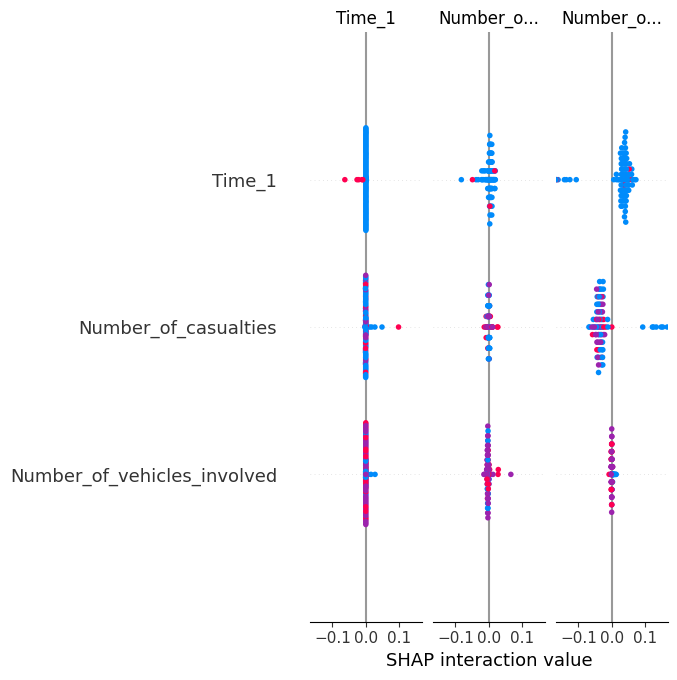

In [66]:
# Assuming X_train and y_train are your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming rf_model is your trained RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for a set of samples (e.g., the first 100 samples in the test set)
shap_values = explainer.shap_values(X_test.iloc[:100, :])

# Plot the summary plot
shap.summary_plot(shap_values, X_test.iloc[:100, :])


In [ ]:
# Tried to use SHAP in this project but for some reason the graphs are not showing
# as I would have expected. Will either come back to it later or do it in a future project.

In [ ]:
# Similarly, will use evidently also as a next step in further assignments